<a href="https://colab.research.google.com/github/ShreyasJorapur/e-commerce/blob/main/Indian_StartUp_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from  google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [ ]:
sns.set(style='whitegrid')

In [ ]:
def readcsv(filepath, filename):

 import os

 os.chdir(filepath)

 file = pd.read_excel(filename)

 return file

filepath = "/content/drive/MyDrive/KLE BCA GOKAK"

filename = "startup_funding138.xlsx"

df = readcsv(filepath, filename)

#print(df.head(3))

In [ ]:
print(pd.DataFrame(df.head(3)))

   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Private Equity   
2  Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...    Seed Funding   

   Amount_In_INR Remarks  
0      1300000.0     NaN  
1            NaN     NaN  
2            NaN     NaN  


In [ ]:
print("First 5 rows:")

print(df.head())





print("\nDataset Info:")

print(df.info())

#Check for missing values

print("\nMissing Values:")

print(df.isnull().sum())

First 5 rows:
   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   
3    3  2017-02-08 00:00:00          Zepo  Consumer Internet   
4    4  2017-02-08 00:00:00  Click2Clinic  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   
3                         DIY Ecommerce platform        Mumbai   
4                  healthcare service aggregator     Hyderabad   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Privat

In [ ]:
#Fill missing values

df["Industry_Vertical"] = df ['Industry_Vertical'].fillna("Others")

df["SubVertical"] = df['SubVertical'].fillna('Not Specified')

df['City_Location'] = df ['City_Location'].fillna('Not Specified')

df ['Investors Name'] = df ['Investors_Name'].fillna('Undisclosed')

#Convert date column to datetime and extract year/month

df ["Date"] = pd.to_datetime(df['Date'], errors="coerce")

df['Year'] =  df['Date'].dt.year

df['month'] = df ['Date'].dt.month

In [ ]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'Industry_Vertical', 'SubVertical',
       'City_Location', 'Investors_Name', 'InvestmentType', 'Amount_In_INR',
       'Remarks', 'Investors Name', 'Year', 'month'],
      dtype='object')

In [ ]:
df['Amount_In_INR'] = df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())



In [ ]:
df.to_csv("startup_funding_cleaned.csv", index=False)

In [ ]:
#Apply the function to the Amount column
df['Amount_In_INR'] = df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())

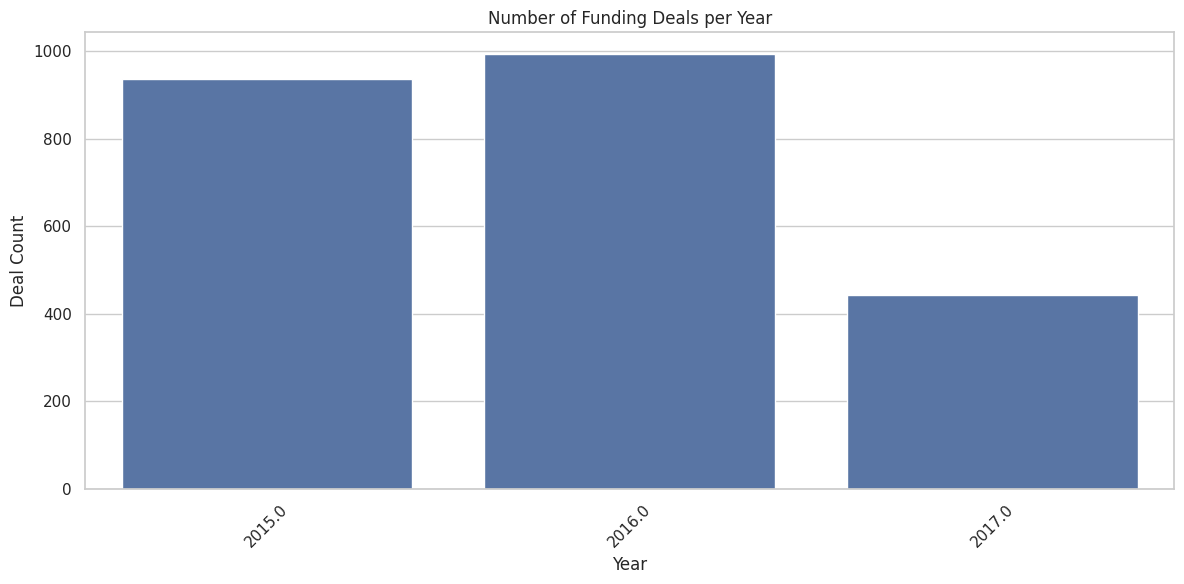

In [ ]:
plt.figure ( figsize = (12, 6))

sns.countplot(x='Year', data=df)

plt.title("Number of Funding Deals per Year")

plt.xlabel("Year")

plt.ylabel("Deal Count")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

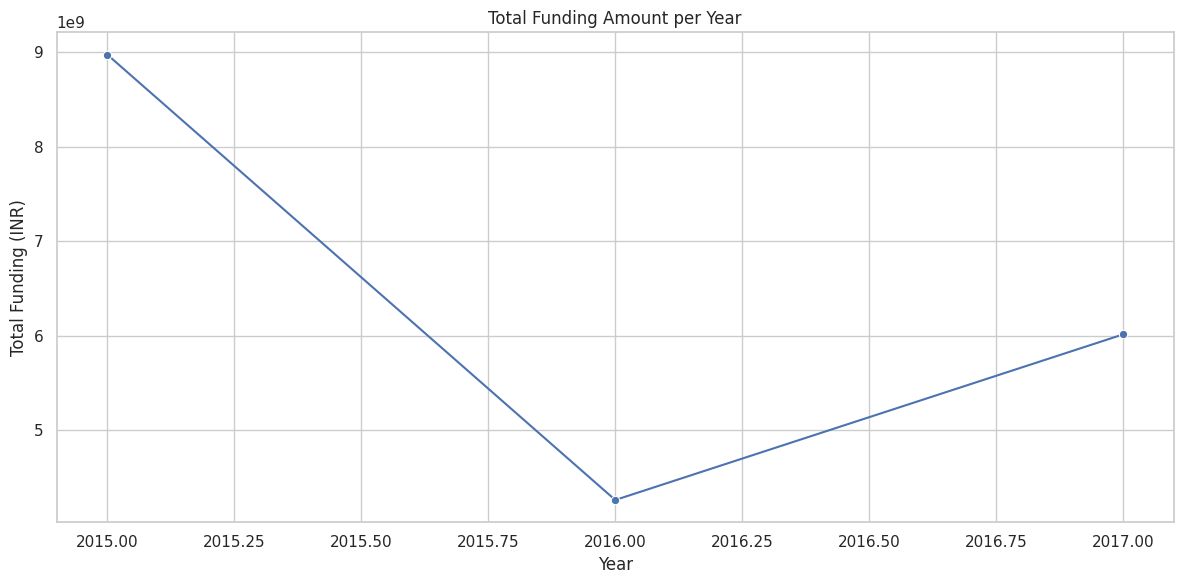

In [ ]:
#Total funding per year

yearly_funding = df.groupby("Year") ["Amount_In_INR"].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(x='Year', y='Amount_In_INR', data = yearly_funding, marker="o")

plt.title("Total Funding Amount per Year")

plt.xlabel("Year")

plt.ylabel("Total Funding (INR)")

plt.grid(True)

plt.tight_layout()

plt.show()

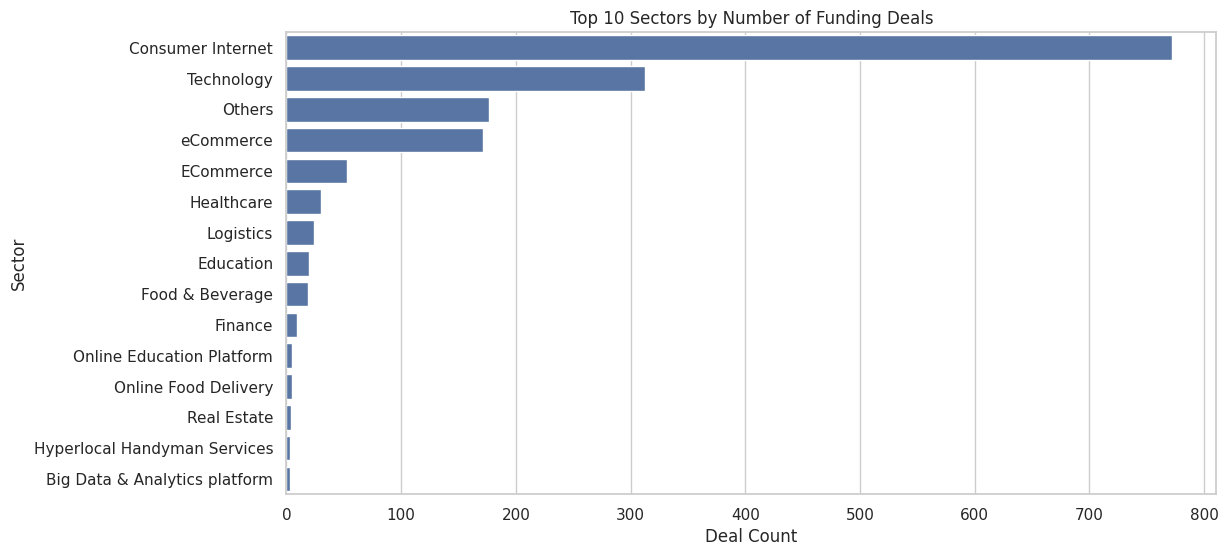

In [ ]:
# Top sectors by deal count

top_sectors = df[ 'Industry_Vertical'].value_counts().head(15)

plt.figure(figsize=(12, 6))

sns.barplot(x=top_sectors.values, y=top_sectors.index)

plt.title("Top 10 Sectors by Number of Funding Deals")

plt.xlabel("Deal Count")

plt.ylabel("Sector")

plt.show()

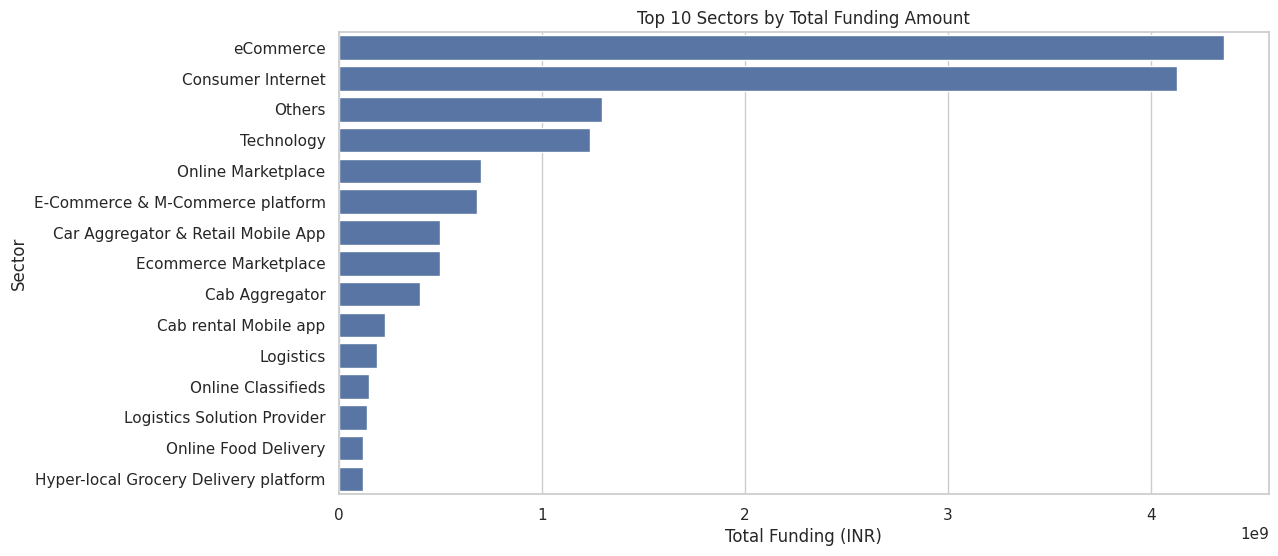

In [ ]:
#Top sectors by total funding

df['Industry_Vertical'] = df['Industry_Vertical'].replace({'ECommerce': 'eCommerce'})

sector_funding  = df.groupby ('Industry_Vertical')['Amount_In_INR'].sum().sort_values(ascending = False).head(15)

plt.figure(figsize=(12, 6))

sns.barplot(x=sector_funding.values, y=sector_funding.index)

plt.title("Top 10 Sectors by Total Funding Amount")



plt.xlabel("Total Funding (INR)")

plt.ylabel("Sector")

plt.show()

In [ ]:
#Split multiple investors and count

investors_df = df[['StartupName', 'Investors_Name', 'Amount_In_INR']].copy()

investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')

investors_df = investors_df.explode('Investors_Name').dropna()

investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

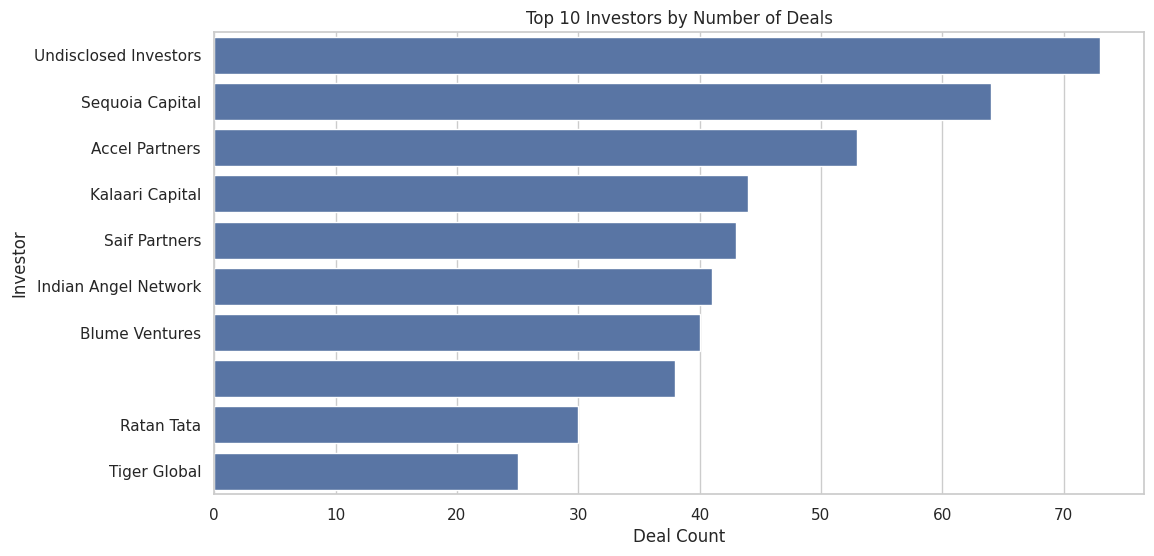

In [ ]:
#Top investors by number of deals

top_investors_deals = investors_df[ 'Investors_Name'].value_counts().head(10)

plt.figure(figsize=(12, 6))

sns.barplot(x=top_investors_deals.values, y=top_investors_deals.index)

plt.title("Top 10 Investors by Number of Deals")

plt.xlabel("Deal Count")

plt.ylabel("Investor")

plt.show()


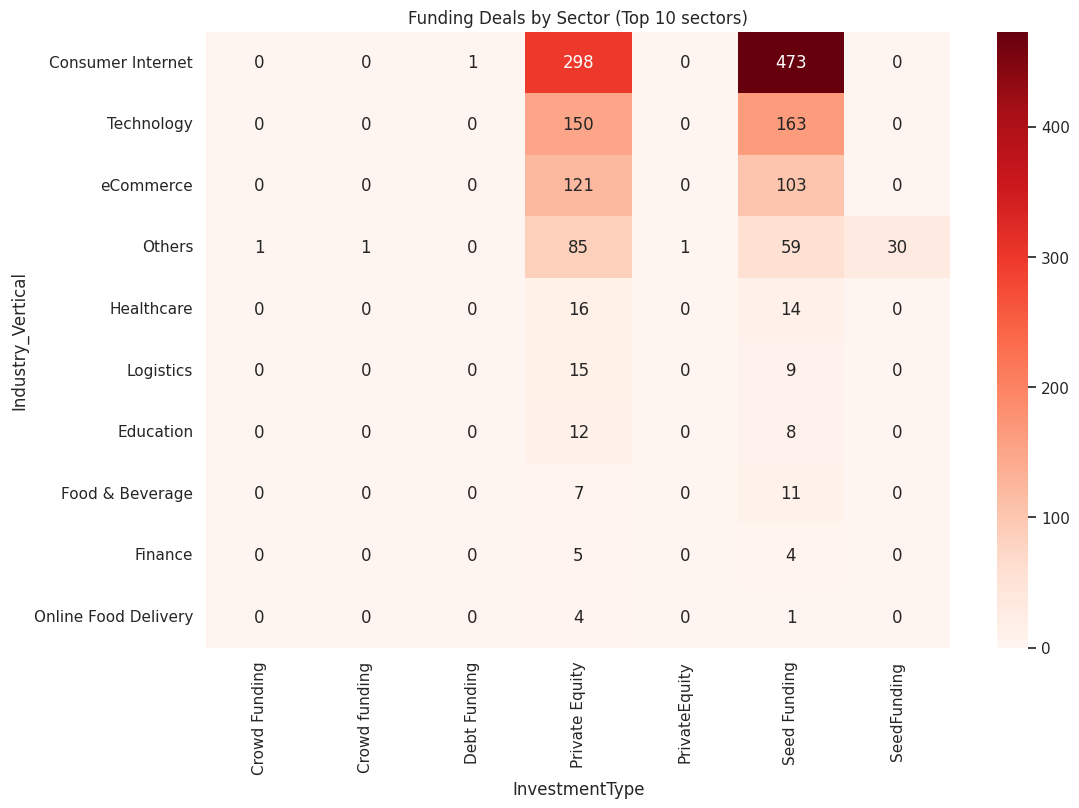

In [ ]:
sector_stage = pd.crosstab(df['Industry_Vertical'],df['InvestmentType'])
sector_stage = sector_stage.loc[sector_stage.sum(axis = 1).sort_values(ascending=False).head(10).index]
plt.figure(figsize=(12,8))
sns.heatmap(sector_stage,annot=True, fmt= "d", cmap='Reds')
plt.title('Funding Deals by Sector (Top 10 sectors)')
plt.show()

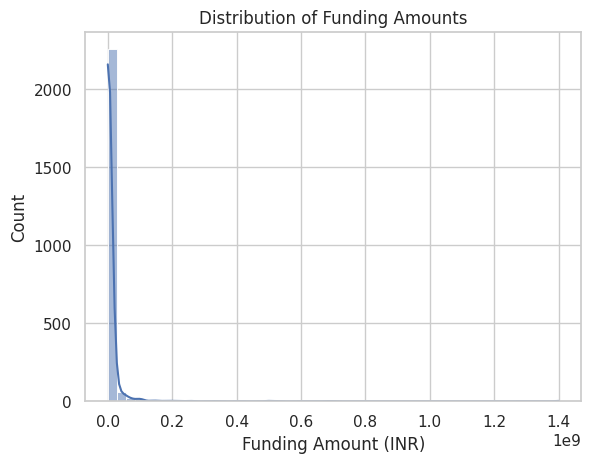

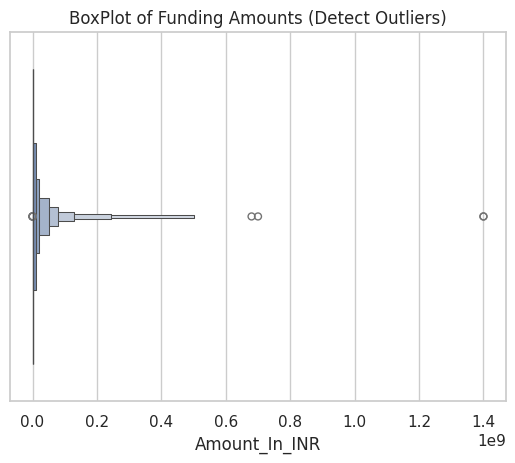

In [ ]:
sns.histplot(df['Amount_In_INR'], bins=50,  kde=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount (INR)')
plt.show()

sns.boxenplot(x=df['Amount_In_INR'])
plt.title('BoxPlot of Funding Amounts (Detect Outliers)')
plt.show()

In [ ]:
#Split multiple investors and count

investors_df = df[['StartupName', 'Investors_Name', 'Amount_In_INR']].copy()

investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')

investors_df = investors_df.explode('Investors_Name').dropna()

investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
def classify_investor(name):
  name = name.lower()



  if any (word in name for word in['capital', 'venture', "partners", "fund", "vc", "labs"]):
    return 'VC'



  elif any (word in name for word in ['angle', 'network']):
    return 'Angle'



  elif any(word in name for word in['corp', 'limited', 'pvt', 'ltd', 'ine']):
     return 'Corporate'



  else:
     return 'Other'





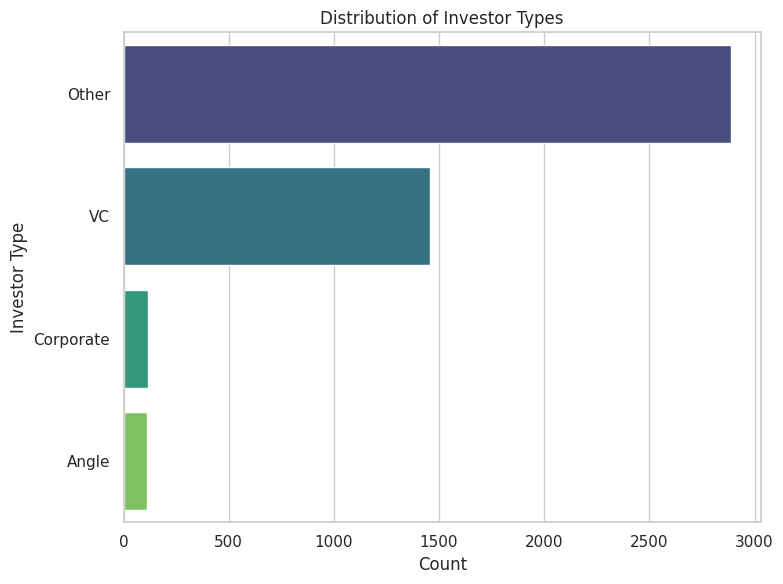

In [ ]:
investors_df['Investor_Type'] = investors_df['Investors_Name'].apply(classify_investor)
investor_type_counts = investors_df["Investor_Type"].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=investor_type_counts.values, y=investor_type_counts.index, palette='viridis')
plt.title("Distribution of Investor Types")
plt.xlabel("Count")
plt.ylabel("Investor Type")
plt.tight_layout()
plt.show()


In [ ]:
#Group by startup and year then copute cumulative funding

startup_growth=df.groupby(['StartupName', 'Year'])['Amount_In_INR'].sum().unstack().fillna(0).cumsum()

#Select top 5 funded startups

top_startups=startup_growth.sum(axis=1).sort_values(ascending=False).head(5).index

In [ ]:
def readcsv(filepath, filename):
    import os
    os.chdir(filepath)
    file = pd.read_excel(filename)
    return file

filepath = "/content/drive/MyDrive/KLE BCA GOKAK"
filename = "startup_funding138.xlsx"
df = readcsv(filepath, filename)

#Fill missing values
df["Industry_Vertical"] = df ['Industry_Vertical'].fillna("Others")
df["SubVertical"] = df['SubVertical'].fillna('Not Specified')
df['City_Location'] = df ['City_Location'].fillna('Not Specified')
df ['Investors Name'] = df ['Investors_Name'].fillna('Undisclosed')

#Convert date column to datetime and extract year/month
df ["Date"] = pd.to_datetime(df['Date'], errors="coerce")
df['Year'] =  df['Date'].dt.year
df['month'] = df ['Date'].dt.month

df['Amount_In_INR'] = df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())

In [ ]:
#Split multiple investors and count
investors_df = df[['StartupName', 'Investors_Name', 'Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
def classify_investor(name):
  name = name.lower()

  if any (word in name for word in['capital', 'venture', "partners", "fund", "vc", "labs"]):
    return 'VC'

  elif any (word in name for word in ['angle', 'network']):
    return 'Angle'

  elif any(word in name for word in['corp', 'limited', 'pvt', 'ltd', 'ine']):
     return 'Corporate'

  else:
     return 'Other'

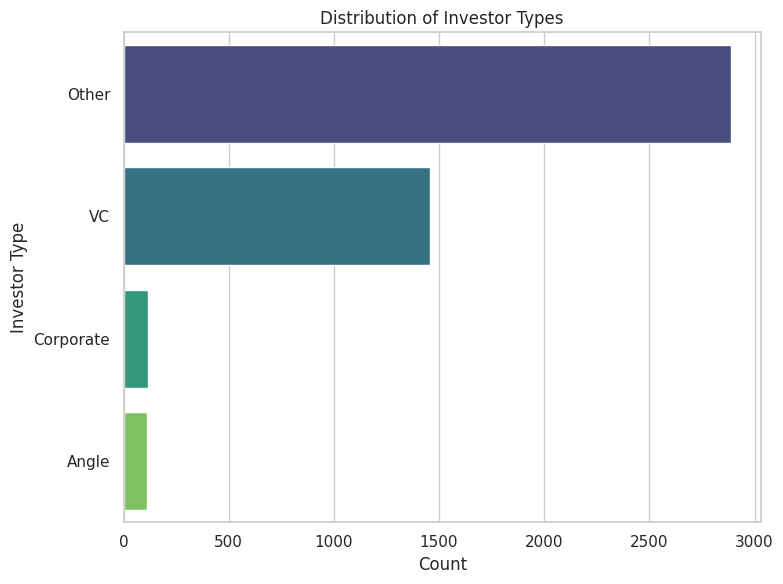

In [ ]:
investors_df['Investor_Type'] = investors_df['Investors_Name'].apply(classify_investor)
investor_type_counts = investors_df["Investor_Type"].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=investor_type_counts.values, y=investor_type_counts.index, palette='viridis')
plt.title("Distribution of Investor Types")
plt.xlabel("Count")
plt.ylabel("Investor Type")
plt.tight_layout()
plt.show()

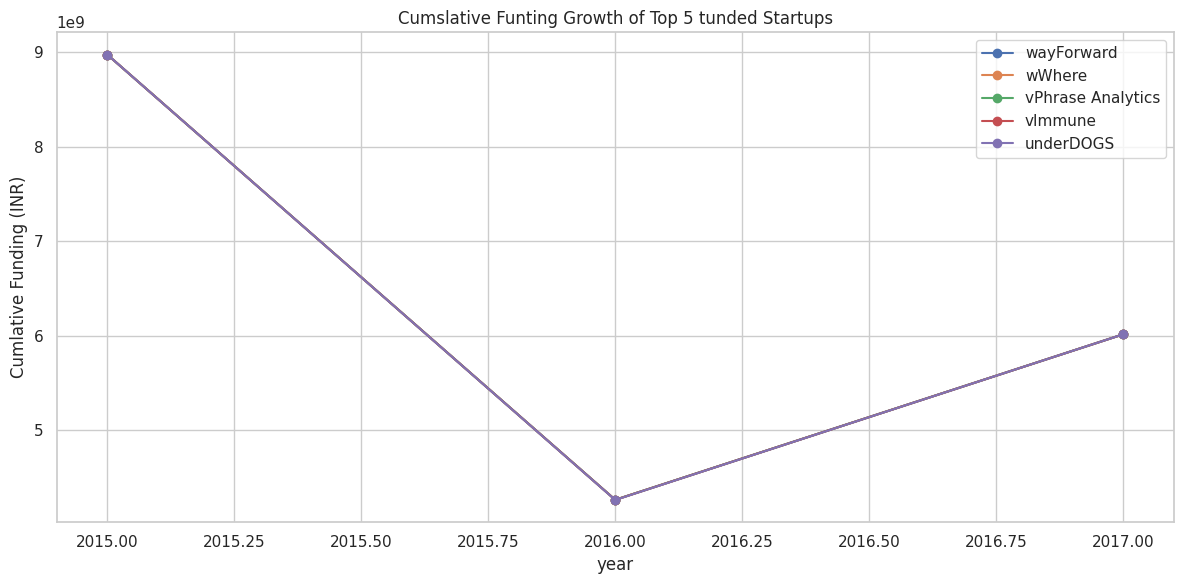

In [ ]:
plt.figure(figsize=(12,6))

for startup in top_startups:
  plt.plot(startup_growth.loc[startup].index, startup_growth.loc[startup].values, label=startup, marker='o')



plt.title( 'Cumslative Funting Growth of Top 5 tunded Startups')

plt.xlabel('year')

plt.ylabel( 'Cumlative Funding (INR)')

plt. legend()

plt.grid(True)

plt.tight_layout()

plt.show()



In [ ]:
#Convert date calume to datetime and setract year/wonth off Date) pd.to datetime of Data, arrorscore)


df['Date']= pd.to_datetime(df['Date'], errors='coerce')

df['Year']= df['Date'].dt.year

df['month']= df['Date'].dt.month


startup_growth = df.groupby(['StartupName', 'Year'])['Amount_In_INR'].sum().unstack().fillna(0).cumsum()

top_startups = startup_growth.sum(axis=1).sort_values(ascending=False).head(5).index



In [ ]:
investors_df = df[["StartupName", "Investors_Name"]].copy()

investors_df ['Investors_Name']=investors_df['Investors_Name'].str.split(',')

investors_df=investors_df.explode('Investors_Name').dropna()

investors_df ['Investors_Name'] =investors_df[ 'Investors_Name']. str.strip().str.title()

In [ ]:
#Count how many time an inestor invested in the same startup

investors_startup_count = investors_df.groupby(["Investors_Name", "StartupName"]).size().reset_index(name="DealCount")

repeat_investors = investors_startup_count[investors_startup_count["DealCount"] > 1]

repeat_investors_summary = repeat_investors["Investors_Name"].value_counts().head()

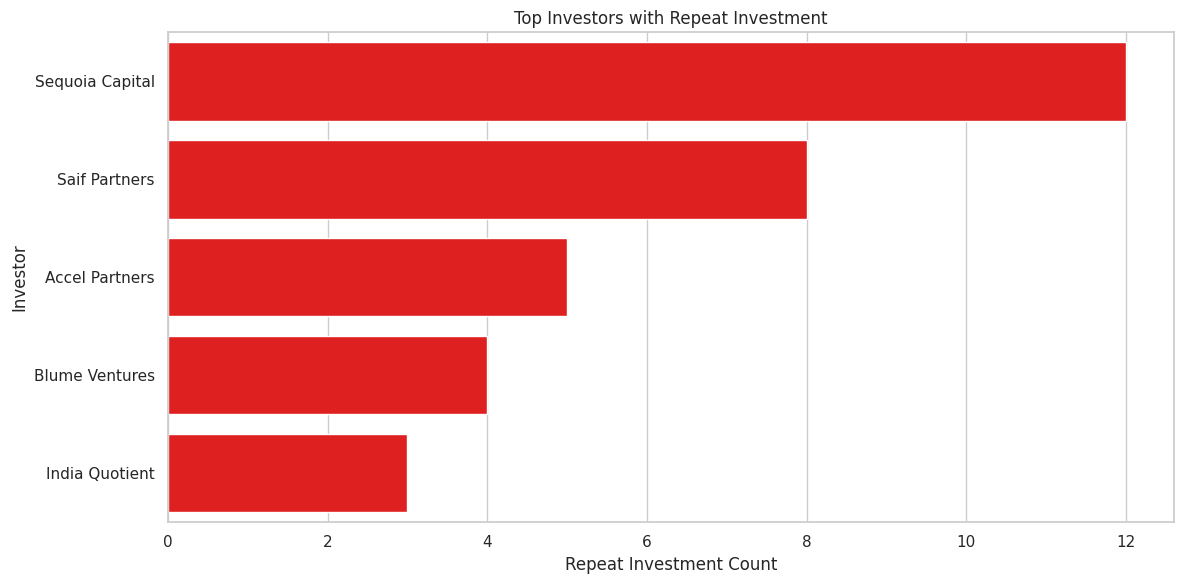

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot(x=repeat_investors_summary.values, y=repeat_investors_summary.index, color="Red")

plt.title("Top Investors with Repeat Investment")

plt.xlabel("Repeat Investment Count")

plt.ylabel("Investor")

plt.tight_layout()

plt.show()

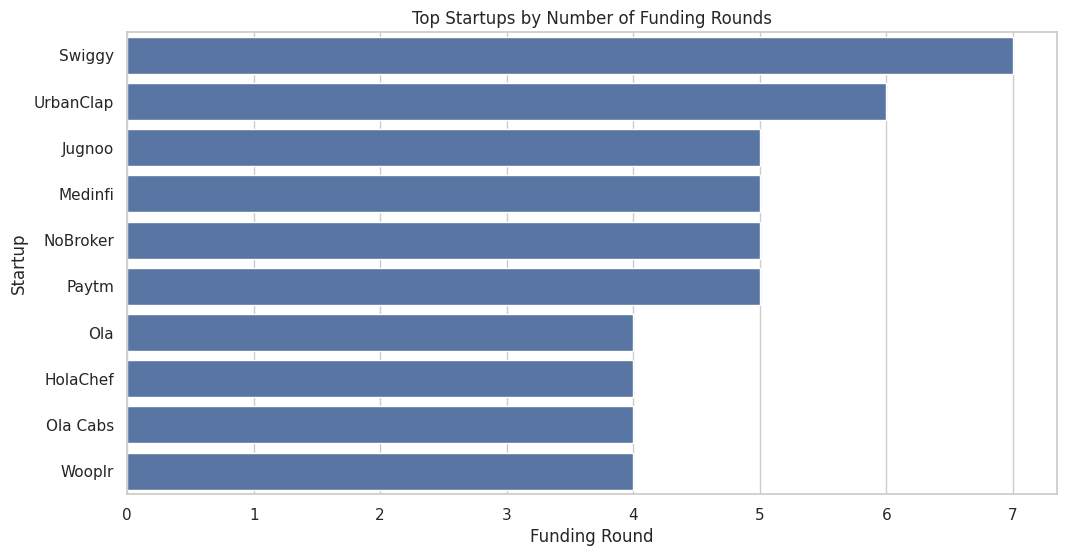

In [ ]:
startup_rounds = df.groupby('StartupName').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

sns.barplot(x=startup_rounds.values, y=startup_rounds.index)

plt.title("Top Startups by Number of Funding Rounds")

plt.xlabel("Funding Round")

plt.ylabel("Startup")

plt.show()

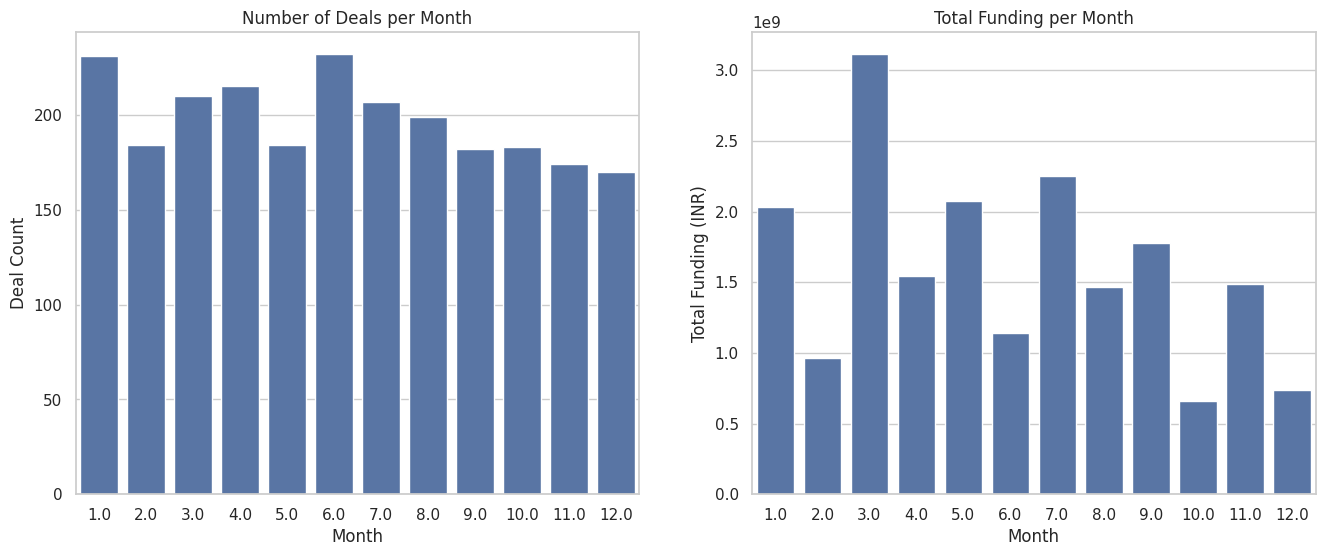

In [ ]:
df['Month'] = df['Date'].dt.month

monthly_deals = df['Month'].value_counts().sort_index()

monthly_funding = df.groupby('Month')['Amount_In_INR'].sum()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=monthly_deals.index, y=monthly_deals.values, ax=ax[0])

ax[0].set_title('Number of Deals per Month')

ax[0].set_xlabel('Month')

ax[0].set_ylabel("Deal Count")

sns.barplot(x=monthly_funding.index, y=monthly_funding.values, ax=ax[1])

ax[1].set_title('Total Funding per Month')

ax[1].set_xlabel("Month")

ax[1].set_ylabel("Total Funding (INR)")

plt.show()

In [ ]:
def readcsv(filepath,filename):
  import os
  os.chdir(filepath)
  file = pd.read_excel(filename)
  return file

filepath = "/content/drive/MyDrive/KLE BCA GOKAK"
filename = "startup_funding138.xlsx"

df = readcsv(filepath,filename)

Undisclosed Deals: 847
Disclosed Deals: 1525


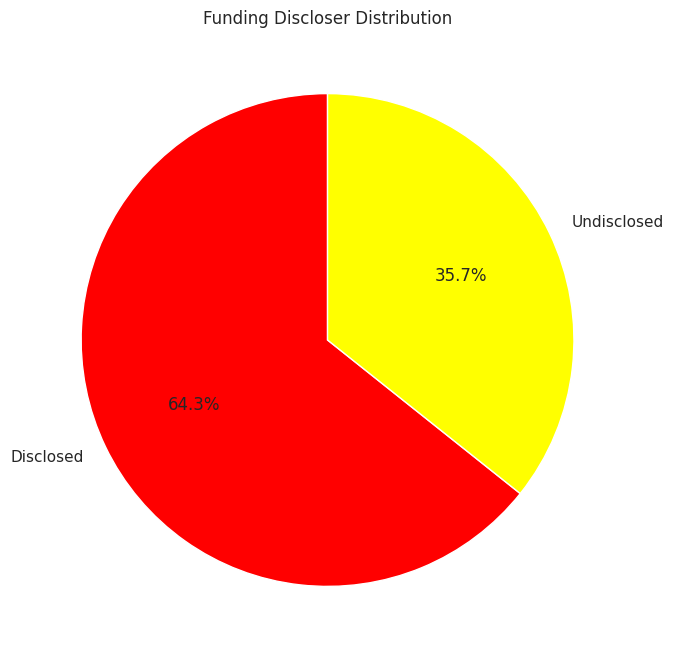

In [ ]:
undisclosed_deals = df[df['Amount_In_INR'].isna()]
disclosed_deals = df[df['Amount_In_INR'].notna()]

print(f'Undisclosed Deals: {len(undisclosed_deals)}')

print(f'Disclosed Deals: {len(disclosed_deals)}')

labels = ['Disclosed','Undisclosed']
sizes = [len(disclosed_deals), len(undisclosed_deals)]

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=["red","yellow"])
plt.title("Funding Discloser Distribution")
plt.show()